# Stat 305 Lab 4: Conditional probability and conditional distributions

**For the lab, you must work in teams of 2, submitting one notebook per team.**  (There is only a lab to submit for this week; no written HW.)

**TYPE YOUR NAMES HERE**

## Introduction

This Jupyter notebook provides a template for you to fill in. **Read the notebook from start to finish, completing the parts as indicated.**  To run a cell, make sure the cell is highlighted by clicking on it, then press SHIFT + ENTER on your keyboard.  (Alternatively, you can click the "play" button in the toolbar above.)

Some code has already been provided.  Be sure to run this code and view the output to understand what it does.  In other parts, you will need to provide the code yourself; use the examples provided as a guide. 

You will use the Python package [Symbulate](https://github.com/dlsun/symbulate).   **You should use only use Symbulate commands, not general Python code.**

**Thought questions:** You should think about and discuss briefly with your partner before proceeding, but you do not need to type a response.

Be sure to run the following lines first.

In [1]:
# If in Colab, uncomment the following line and run this cell first
# !pip install symbulate

In [2]:
from symbulate import *
%matplotlib inline

# Lab 4

In this lab you will:

- Be introduced to conditional probability
- Investigate the difference between conditional probability and unconditional probability
- Investigate conditional distributions of random variables, and conditional expected values
- Think about conditioning as "slicing and renormalizing"

## a) Introduction to conditional probability

This Example is related to Exercise 10.1 in Handout 10.  Suppose that the probability that a randomly selected American is:

- a Democrat and supports impeachment of President Trump is 0.26.
- a Democrat and does not support impeachment of President Trump is 0.05.
- not a Democrat and supports impeachment of President Trump is 0.23.
- not a Democrat and does not support impeachment of President Trump is 0.46.

**Thought question.** Fill in the "blank": the probability that an American is a Democrat and supports impeachment is "blank" times larger than the the probability that an American is a Democrat and does not support impeachment. Do the two probabilities in the previous sentence add to 1?  

Define a probability space whose outcomes are (impeachment, party) pairs according to the above specifiations.  The `BoxModel` below gets you started, but you will need to change [`probs`](https://dlsun.github.io/symbulate/probspace.html#boxmodel).  Note that each "ticket" in this BoxModel is a pair of values.

In [3]:
# You need to revise probs below
P = BoxModel([('Support', 'Democrat'),
              ('Support', 'Not Democrat'),
              ('Not Support', 'Democrat'),
              ('Not Support', 'Not Democrat')],
             probs = [0.26, 0.23, 0.05, 0.46])

Simulate many outcomes, store the results, and summarize the simulated outcomes in a table of counts. (Remember [`.tabulate()`](https://dlsun.github.io/symbulate/sim.html#tabulate))

In [4]:
# Enter your Symbulate code here

In [5]:
outcomes = P.sim(10000)
outcomes.tabulate()

"('Not Support', 'Democrat')",504
"('Not Support', 'Not Democrat')",4514
"('Support', 'Democrat')",2611
"('Support', 'Not Democrat')",2371
Total,10000


Suppose we want to estimate the **conditional probability** that a *Democrat* supports impeachment.  We can do this by computing the simulated proportion *of Democrats* who support impeachment.  Note: this part does this "the long way".  We'll see a shorter way in part c).

We want to take our simulation results and only consider the Democrats; we can do this with a [`filter`](https://dlsun.github.io/symbulate/sim.html#filter) function.  The function `is_Democrat` below takes as an input a (impeachment, party) pair and returns `True` if party (that is, `(impeachment, party)[1]`) is Democrat. Applying `filter(function)` retains only those values for which `function = True`.

Using the simulation results you stored above, create a table of counts just for the Democrats.  (Hint: use `.filter(is_Democrat)` before `.tabulate()`.)

In [6]:
# Be sure to run this cell
def is_Democrat(Impeachment_Party):
    return Impeachment_Party[1] == 'Democrat'

In [7]:
outcomes.filter(is_Democrat).tabulate()

"('Not Support', 'Democrat')",504
"('Support', 'Democrat')",2611
Total,3115


In [8]:
# Enter your Symbulate code here

Use the simulation results to find the simulated proportion *of Democrats* who support impeachment.

Hints:

- Apply `filter` to select the Democrats (as in the previous part)
- Define an `is_Support` function which returns True if a (impeachment, party) pair supports impeachment
- Use `count(is_Support)` to count the Democrats who support impeachment
- Divide the appropriate counts to find the proportion.  (What's the denominator?)

In [9]:
def is_Support(Impeachment_Party):
    return Impeachment_Party[0] == 'Support'

outcomes.filter(is_Democrat).count(is_Support) / len(outcomes.filter(is_Democrat))

0.8382022471910112

Check your calculation by creating a table of relative frequencies just among the Democrats.  (Hint: use `.filter(is_Democrat)` before `.tabulate(normalize = True)`.)

In [10]:
outcomes.filter(is_Democrat).tabulate(normalize = True)

"('Not Support', 'Democrat')",0.16179775280898875
"('Support', 'Democrat')",0.8382022471910112
Total,1.0


**Thought question.** Fill in the blank: *Among the Democrats* the proportion who support impeachment is "blank" times larger than the proportion who do not support impeachment.  Do these two proportions add up to 1?  Does the number that fills in the blank here look familiar (aside from simulation margin of error)?

Explain what we mean by **conditioning is "slicing and renormalizing"**.

## b) Conditional versus unconditional probability

This Example is related to Exercise 10.6 in Handout 10. Consider a group of 5 people: Harry, Bella, Frodo, Anakin, Katniss. Suppose each of their names is written on a slip of paper and the 5 slips of paper are placed into a hat. The
papers are mixed up and 2 are pulled out, one after the other **without replacement**.

We are interested in the following questions.

1. What is the probability that Harry is the first name selected?
1. What is the probability that Harry is the second name selected?
1. If Bella is the first name selected, what is the probability that Harry is the second name selected?

**Thought question.** Before proceeding, give your best guess of each of these probabilites.

Define a probability space whose outcomes are (first, second) pairs of names drawn.  Hint: use `BoxModel` with [`replace = False`](https://dlsun.github.io/symbulate/probspace.html#boxmodel).

Note: if you don't want to deal with strings, you can label Harry as 1, Bella as 2, ..., Katniss as 5.

In [11]:
P = BoxModel([1, 2, 3, 4, 5], size = 2, replace = False)

In [12]:
# Enter your Symbulate code here

Simulate many outcomes and store the results.

In [13]:
outcomes = P.sim(10000)
outcomes.tabulate()

"(1, 2)",525
"(1, 3)",461
"(1, 4)",500
"(1, 5)",502
"(2, 1)",484
"(2, 3)",496
"(2, 4)",524
"(2, 5)",484
"(3, 1)",498
"(3, 2)",489
"(3, 4)",503


In [14]:
# Enter your Symbulate code here

Use the simulation results to estimate the probability that Harry is the first name selected. Hint: for this and the following parts, use the impeachment problem as a guide.  Like in that problem, an outcome here is a pair, (first, second). 

In [15]:
def H_is_first(pair):
    return pair[0] == 1

len(outcomes.filter(H_is_first)) / 10000

0.1988

In [16]:
# Enter your Symbulate code here

Use the simulation results to estimate the probability that Harry is the second name selected.  (Hint: what's the demoninator?)

In [17]:
def H_is_second(pair):
    return pair[1] == 1

len(outcomes.filter(H_is_second)) / 10000

0.1932

In [18]:
# Enter your Symbulate code here

Use the simulation results to estimate: If Bella is the first name selected, what is the probability that Harry is the second name selected?

In [19]:
def B_is_first(pair):
    return pair[0] == 2

outcomes.filter(B_is_first).count(H_is_second) / len(outcomes.filter(B_is_first))

0.24346076458752516

In [20]:
# Enter your Symbulate code here

**Thought question.**  Revisit the questions at the beginning.  In light of your simulation results,

1. What is the probability that Harry is the first name selected?
1. What is the probability that Harry is the second name selected?
1. If Bella is the first name selected, what is the probability that Harry is the second name selected?

What is the difference between questions (2) and (3)?  Which one involves a conditional probability and which one involves an unconditional probability?

## c) Conditional distributions of discrete random variables

We introduce conditional distributions in the dice rolling example we have seen a few times now.

For the probability space corresponding to two rolls of a fair four-sided die, let $X$ be the sum of the two rolls and $Y$ be the larger of the two rolls (or the common value if a tie).

Define the probability space and random variables.

In [21]:
# Enter your Symbulate code here

In [22]:
P = BoxModel([1, 2, 3, 4], size = 2)
X = RV(P, sum)
Y = RV(P, max)

Simulate many $(X, Y)$ pairs (remember `(X & Y)`), store the results and summarize the simulated values in a `'tile'` plot and a table.

In [23]:
# Enter your Symbulate code here

"(2, 1)",1072
"(3, 2)",1930
"(4, 2)",1002
"(4, 3)",2008
"(5, 3)",1960
"(5, 4)",2029
"(6, 3)",1020
"(6, 4)",1972
"(7, 4)",2029
"(8, 4)",978
Total,16000


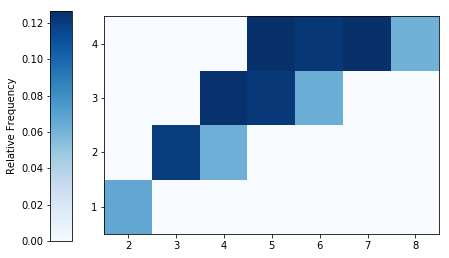

In [24]:
xy = (X & Y).sim(16000)
xy.plot('tile')
xy.tabulate()

**Thought questions.** What do you think is the *conditional distribution* of $Y$ given $X=6$?  Remember, a distribution represents possible values and corresponding probabilities.  If $X=6$, what are the possible values that $Y$ could be? What do you think will be true about the corresponding probabilities? How could you use the simulation to approximate these conditional probabilities? 

In the previous problems, we used filter to extract subsets to compute conditional probabilities.  A disadvantage of this method is that the approximate conditional probability is only based on the repetitions that satisfy the condition, and not on the total number of repetitions.  For example, in the impeachment problem, the estimate of the conditional probability that a Democrat supports impeachment was only based on the around 3100 Democrats simulated, rather than the total of 10000 repetitions.  This affects the *margin of error* of our estimates.

An alternative is to keep performing the simulation until a desired number of repetitions *that satisfy the conditioning event* are achieved.  For example, we could keep running the simulation until we get 10000 Democrats, instead of just simulating 10000 people and getting however many Deomcrats we get.

This alternative method can be achieved by using `|`, the "given" symbol.  The following shows how we can simulate the conditional distribution of $Y$ given $X=6$ based on 10000 repetitions for which $X=6$.

Note that:

- the total count in the table is 10000
- the event being conditioned on, $\{X = 6\}$, needs to be placed in parentheses, `(X == 6)`.  Also `==` represents logical equality.
- The table and plot represent the *distribution of $Y$ values* given that $X=6$. $Y$ is the quantity that is varying; $X$ is conditioned to be 6.

3,3397
4,6603
Total,10000


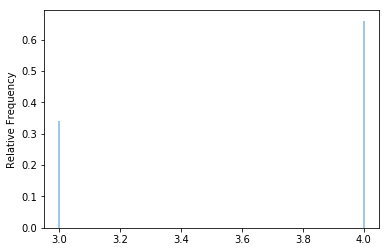

In [25]:
y_given_X_eq_6 = ( Y | (X == 6) ).sim(10000)
y_given_X_eq_6.plot()
y_given_X_eq_6.tabulate()

**Thought questions.**

Look at the tile plot of $(X, Y)$ pairs that you created previously.

- What regions of the plot correspond to $X=6$?
- Among the repetitions for which $X=6$, what is the relative heights of the tiles, as represented by the color intensity, for $Y=4$ compared to $Y=3$?  That is, fill in the blank: the height for $Y=4$ is "blank" times larger than the height for $Y=3$.
- In the tile plot of the joint distribution, do the two heights for $Y=4$ and $Y=3$ add to 1?

Now look at the impulse plot of the conditional distribution of $Y$ given $X=6$ above.

- Values of what variable are displayed on the horizontal axis?
- What is the relative height for $Y=4$ compared to $Y=3$?  How does this correspond to what you observed for the tile plot?
- In the impulse plot of the conditional distribution, do the two heights for $Y=4$ and $Y=3$ add to 1?

Explain what we mean by **conditioning is "slicing and renormalizing"**.

How can you use your simulation results to estimate the *conditional expected value* of $Y$ given $X=6$?  Enter the appropriate code here.  (Hint: remember all 10000 values satisfy $X=6$.  How do we usually use simulation to approximate expected values?)

In [26]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $Y$ given $X=5$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [27]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $Y$ given $X=4$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [28]:
# Enter your Symbulate code here

What if we condition on the value of $Y$? Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $X$ given $Y=2$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [29]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $X$ given $Y=3$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [30]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $X$ given $Y=4$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [31]:
# Enter your Symbulate code here

**Thought question.** I didn't have you condition on $Y=1$, or on $X=2$, $X=3$, $X=7$, or $X=8$.  What happens in each of these cases?  For example, what is the conditional distribution of $Y$ given $X=7$?

## d) Conditional distributions of continuous random variables

Here is another example we've seen a few times, the continuous analog of the dice rolloing example.

For the probability space corresponding to two spins of the Uniform(0, 1) spinner, let $X$ be the sum of the two spins and let $Y$ be the larger value.

Define the probability space and random variables.

In [32]:
P = Uniform(0, 1) ** 2
X = RV(P, sum)
Y = RV(P, max)

In [33]:
# Enter your Symbulate code here

Simulate many $(X, Y)$ pairs (remember `(X & Y)`), store the results and summarize the simulated values in a `'density'` plot.  (You can also try `'scatter'`, but it's hard to see density, or `'hist'` which will produce the plot but will give an error.) 

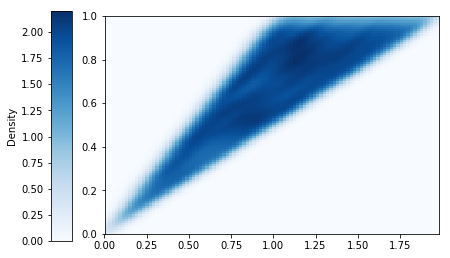

In [34]:
xy = (X & Y).sim(10000)
xy.plot('density')

**Thought question.** Do the $(X, Y)$ pairs appear to be uniformly distributed (aside from simulation margin of error) over the triangular region of possible values?  The density height appears to be a constant of 2 for all pairs within the triangular region of possible values --- why 2?

**Thought questions.** Now we're going to consider the conditional distribution of $Y$ given $X=1$.

- What region of the density plot corresponds to the event $X=1$?
- What is the distribution of $Y$ values over this region?  What are possible values of $Y$ given $X=1$?  Are the values roughly uniformly distributed over this region?
- What would a plot of the conditional distribution of $Y$ given $X=1$ look like?
- We will do a simulation, but why do we NOT want to run `(Y | (X == 1) ).sim(10000)`?  Remember: $X$ is a *continuous* random variable.

Remember, the probability that a *continuous* random variable is equal to any particular value (with infinite precision) is 0.  So trying to run `(Y | (X == 1) ).sim(10000)` will run forever!  Remember, density for continuous random variables represents an idealized, smooth mathematical model of what happens in the limit as the measurement precision gets finer and finer.  But in practice, we only care about a certain number of decimal places.  So rather than conditioning on $\{X = 1\}$ we condition on an event like $\{|X-1| < 0.01\}$, the event that $X$ differs from 1 by no more than 0.01 (or whatever the desired precision is).  Careful, even though an event like $\{|X-1| < 0.01\}$ has non-zero probability, the probability might still be small and so `|` might require a long simulation to achieve the desired number of repetitions that satisfy the condition. 

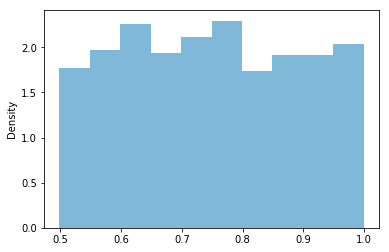

In [35]:
y_given_X_eq_1 = (Y | (abs(X - 1) < 0.01) ).sim(1000)
y_given_X_eq_1.plot(bins = 10)

How can you use your simulation results to estimate the *conditional expected value* of $Y$ given $X=1$? Enter the appropriate code here.  (Hint: remember all 1000 values satisfy $X=1$.  How do we usually use simulation to approximate expected values?)

In [36]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a plot) the the conditional distribution of $Y$ given $X=0.5$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [37]:
# Enter your Symbulate code here

Run a new simulation and use the results to approximate (in a plot) the the conditional distribution of $Y$ given $X=1.5$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [38]:
# Enter your Symbulate code here

What if we condition on the value of $Y$? Run a new simulation and use the results to approximate (in a table and plot) the the conditional distribution of $X$ given $Y=0.5$, and its conditional expected value.  But think first: what do you think this distribution will look like?

In [39]:
# Enter your Symbulate code here

**Thought questions.**

- Look at each of the histograms displaying a conditional distribution.  Is the area under the curve (roughly) 1?
- Explain how conditioning is "slicing and renormalizing".
- Can you think of a general expression for the conditional distribution of $X$ given $Y=y$ for any particular $y$?  The conditional expected value?

In [40]:
# Enter your Symbulate code here

## e) Non-uniform joint and conditional distributions

The previous problem illustrated the idea of joint and conditional distributions of continuous random variables.  But in that problem the joint distribution and the conditional distributions (at least when conditioning on a particular value) were Uniform.  In this example you'll see how "slicing and renormalizing" works with non-uniform distributions.

For the probability space corresponding to two spins of the Uniform(0, 1) spinner, let $X$ be the sum of the two spins and let $Y$ be the product of the two spins.

In [41]:
P = Uniform(0, 1) ** 2
U1, U2 = RV(P)
X = U1 + U2
Y = U1 * U2

Here is a plot of the simulated joint density of $X$ and $Y$.  Don't worry about why this shape is what it is, just know that it is *not* uniform; certain $(x, y)$ pairs have higher density than others.

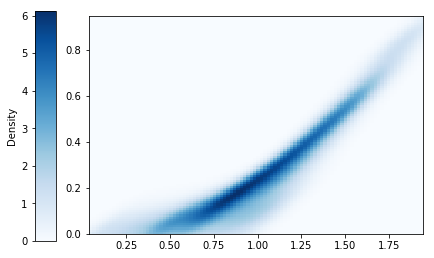

In [42]:
(X & Y).sim(1000).plot('density')

**Thought question.** What are the possible values of $Y$ given $X=1$? What would the conditional distribution of $Y$ given $X=1$ look like?  Would it be uniform?

Run a new simulation and use the results to approximate (in a plot) the the conditional distribution of $Y$ given $X=1$, and its conditional expected value.

In [43]:
# Enter your Symbulate code here

**Thought question.** What would the conditional distribution of $X$ given $Y=0.2$ look like?  Would it be uniform?

Run a new simulation and use the results to approximate (in a plot) the the conditional distribution of $X$ given $Y=0.2$, and its conditional expected value.

In [44]:
# Enter your Symbulate code here

# f)

Reflection: Write a paragraph, or some bullet points, of what you learned from this lab

**TYPE YOUR RESPONSE HERE.**

# g)

Reflection: Write a paragraph, or some bullet points, of some questions you have about the material introduced in this lab.

**TYPE YOUR RESPONSE HERE.**

## Submission Instructions

- After you have completed the notebook, in Jupyter select **Kernel > Restart kernel and run all** cells.  In JupyterLab, select **Kernel > Restart kernel** then **Run > Run all cells.**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
- **NOTE: If you included any 2d histograms, the error message is going to make the notebook stop running.  You'll have to go back and manually run the remaining cells.**
- Make sure you typed the names of both partners at the top of the notebook where it says "Type your names here".
- Save both a notebook and a HTML version.  In 
  - Notebook: JupyterLab: right click on the file name and choose download. Jupyter: File > Download as > Notebook.  
  - HTML: JupyterLab: select File > Export to > HTML. Jupyter: File > Download as > HTML.
- Submit your files in PL.  Remember, only one submission per team.  (Either partner can submit.)